In [1]:
import astropy as ap
import astropy.io.fits as ap_fits
import astropy.modeling as ap_mod
import copy
import glob
import inspect
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as np_ma
import pandas as pd
import scipy as sp
import scipy.optimize as sp_opt
import scipy.stats as sp_stat
import warnings as warn

import IfA_Smeargle as ifas

In [ ]:
first_run = ifas.yankee.SmeargleConfig('FirstRun.ifaspkl')

first_run.BravoConfig.voltpat_rename_config['archive_data'] = False
first_run.BravoConfig.number_rename_config['archive_data'] = False
first_run.BravoConfig.set_determine_rename_config['archive_data'] = False
first_run.BravoConfig.detector_name = {'name': 'SAPHIRA-MK20-M12145-03_20190927_T40K'}

if (False):
    first_run.BravoConfig.voltpat_rename_config['voltage_pattern'] =  [2.5, 2.5, 2.5, 2.5,
                                                                 4.5, 4.5, 4.5, 4.5,
                                                                 6.5, 6.5, 6.5, 6.5,
                                                                 8.5, 8.5, 8.5, 8.5,
                                                                 9.5, 9.5, 9.5, 9.5,
                                                                 10.5, 10.5, 10.5, 10.5,
                                                                 11.5, 11.5, 11.5, 11.5,
                                                                 11.5, 11.5, 11.5, 11.5,
                                                                 10.5, 10.5, 10.5, 10.5,
                                                                 9.5, 9.5, 9.5, 9.5,
                                                                 8.5, 8.5, 8.5, 8.5,
                                                                 6.5, 6.5, 6.5, 6.5,
                                                                 4.5, 4.5, 4.5, 4.5,
                                                                 2.5, 2.5, 2.5, 2.5]
    first_run.BravoConfig.voltpat_rename_config['begin_garbage'] = 0

print(first_run)

In [ ]:
ifas.zulu.pipelines.SA201907281826_reduction_pipeline('./Data',first_run)

In [ ]:
first_run.ZuluConfig.SA201907281826 = {'early_frame': 3, 'ref_frame': np.array([161,192]), 'sub_avg_frames': np.array([[221,228]]), 'frame_exposure': 5, 'early_sigma': 5}
print(first_run)
ifas.zulu.pipelines.SA201907281826_reduction_pipeline('./Data',first_run)

In [ ]:
data
print(np.nanmean(data.data),np.nanstd(data.data))

In [ ]:
first_run.OscarConfig.general_histogram_config['histogram_plot_paramters']['range'] = [-1000,1000]

figure = ifas.oscar.multi.plot_single_heatmap_and_histogram("./Data\Saphria__num;14__detBias;4.5Vdown__1025-1040.fits",first_run)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure)

In [ ]:
first_run.OscarConfig.general_histogram_config['fit_gaussian'] = True
#first_run.OscarConfig.general_histogram_config['bin_width'] = 5
#first_run.OscarConfig.general_histogram_config['histogram_plot_paramters']['range'] = [-250,100]

__, __, data = ifas.meta.meta_faa.smeargle_open_fits_file("./Data/SAPHIRA-MK12145-02_20190913-40K__num;7__detBias;10.5Vup__slice;513-528.fits")
figure2 = ifas.oscar.multi.plot_single_heatmap_and_histogram(data,first_run)
#figure3 = ifas.oscar.multi.plot_single_heatmap_and_histogram(data.data,first_run)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure2)
plt.show(figure3)

# [ 72 120 136 250 294]
#[-16074. -14058. -13386.  -8598.  -6750.]
ifas.meta.meta_plting.smeargle_save_figure_file(figure2,"website.png")
print(np.histogram(data.data,bins=10))

In [ ]:
__, __, data = ifas.meta.meta_faa.smeargle_open_fits_file("./Data\Saphria__num;14__detBias;4.5Vdown__257-272.fits")
figure2 = ifas.oscar.histograms.plot_array_histogram(data.data,bin_width=10,fit_gaussian=True)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure2)

wee, weer = ifas.meta.meta_model.smeargle_fit_histogram_gaussian_function(data.data)

print(np.nanstd(data))

In [ ]:
# Extract histogram data from the data.
hist_data = np.histogram(data.data, bins=ifa.oscar.oscar_bin_width(data.data, 10))
hist_x = (hist_data[1][0:-1] + hist_data[1][1:]) / 2 # Middle of bin.
hist_y = hist_data[0]
   # Filter out some of the outlier pixels, consider only 75% of the 
    # meaningful bins and the bins with a value greater than a limiting entry.
valuecut_index = np.where(hist_y >= 11)
cuthist_x = np.array(hist_x[valuecut_index])
cuthist_y = np.array(hist_y[valuecut_index])

    # Initial guesses...
    # The peak of the data is a good guess for the mean value.
guess_mean = hist_x[np.argmax(cuthist_y)]
print(np.nanstd(cuthist_y))
print(sp_stat.median_absolute_deviation(cuthist_y))
print(sp_stat.variation(cuthist_y))

In [ ]:
ifas.bravo.sanitize.same_file_size_sanitization('./Data')

In [ ]:
glob.glob('./Data*.fits')

In [ ]:
fig, ax = plt.subplots(dpi=300)
ax, data_table, data_frame = ifas.oscar.volt_plot.plotdir_dark_current_over_voltage('./Data/', figure_axes=ax)

#ax.set_yscale('log')
ax.set_ylim((-250,250))

plt.show()

In [ ]:
data_table

In [ ]:
fig2, ax2 = plt.subplots(dpi=300)

ax2.errorbar(data_table['voltage_set1'][0:5], data_table['value_set1'][0:5], yerr=data_table['error_set1'][0:5],
                    fmt='.-', elinewidth=0.25, capsize=3, capthick=0.25,
                    label=('Set ' + str(1)))
ax2.errorbar(data_table['voltage_set2'][0:5], data_table['value_set2'][0:5], yerr=data_table['error_set2'][0:5],
                    fmt='.-', elinewidth=0.25, capsize=3, capthick=0.25,
                    label=('Set ' + str(2)))

title=first_run.BravoConfig.detector_name['name']
ax2.set_title(title)
ax2.legend(loc='upper left')
ax2.set_xticks(np.append(data_table['voltage_set1'][0:5], 0))
ax2.set_xlabel('Detector Bias Voltage (V)')
ax2.set_ylabel('Average Dark Current (ADU)')

plt.show()


In [ ]:
np.append(data_table['voltage_set1'][0:5], 0)

In [ ]:
dataframe.query('volt == @voltage_value and voltslope == @voltage_slope')['num']

In [ ]:
voltage_list = copy.deepcopy(np.sort(np.unique(file_data.loc[:,'volt'].to_numpy())))

set_metadata = []
#slope_list = list(set(dataframe.query('volt == @voltage_value')['voltslope']))

for voltdex in voltage_list:
    slope_list = list(set(file_data.query('volt == @voltdex')['voltslope']))
    
    for slopedex in slope_list:
        query = file_data.query('volt == @voltdex and voltslope == @slopedex')['num']
        filenum = np.sort(np.unique(query))
        
        for numdex, setdex in zip(filenum,np.arange(len(filenum))+1):
            temp_dict = {'metavolt':voltdex,'metaslope':slopedex,'metanum':numdex,'metaset':setdex}
            set_metadata.append(temp_dict)
            
set_metadata = pd.DataFrame(set_metadata)

In [ ]:
set_count = np.flip(np.unique(set_metadata['metaset']))[np.flip(np.unique(set_metadata['metaset'],return_counts=True)[1]).argmax()]

for setdex in (np.arange(set_count) + 1):
    dataset_list = set_metadata.query('metaset == @setdex')
    
    x_axis_voltage = []
    y_axis_data = []
    y_axis_error = []
    
    for voltdex in voltage_list:
        fits_file_numbers = list(dataset_list.query('metavolt == @voltdex')['metanum'].to_numpy())
        voltset_data = file_data.query('num == @fits_file_numbers')
        
        x_axis_voltage.append(voltdex)
        y_axis_data.append(np.nanmedian(voltset_data['g_mean']))
        y_axis_error.append(np.nanmedian(voltset_data['g_stddev']))
        
    #####
    x_axis_voltage = np.array(x_axis_voltage)
    y_axis_data = np.array(y_axis_data)
    y_axis_error = np.array(y_axis_error)
    plt.errorbar(x_axis_voltage, y_axis_data, yerr=y_axis_error)


In [ ]:
import importlib

complete_oscar_dict = dict(inspect.getmembers(ifas.oscar, inspect.ismodule))

source_file_list = [inspect.getsourcefile(complete_oscar_dict[keydex]) for keydex in complete_oscar_dict.keys()]
ifa_smeargle_file_list = [filedex for filedex in source_file_list if 'IfA_Smeargle' in filedex]
oscar_file_list = [filedex for filedex in ifa_smeargle_file_list if 'oscar' in filedex]

oscar_mod_name_list = [inspect.getmodulename(oscardex) for oscardex in ifa_smeargle_file_list if 'oscar' in oscardex]

oscar_modspec = [importlib.util.spec_from_file_location(namedex, filedex) for namedex, filedex in zip(oscar_mod_name_list, oscar_file_list)]
oscar_modules = [importlib.util.module_from_spec(specdex) for specdex in oscar_modspec]

for specdex, moduledex in zip(specifications,oscar_modules):
    specdex.loader.exec_module(moduledex)

function_dictionaries = [dict(inspect.getmembers(moduledex,inspect.isfunction)) for moduledex in oscar_modules]

oscar_plotting_functions = {}
for dictionarydex in function_dictionaries: 
    oscar_plotting_functions = {**oscar_plotting_functions, **dictionarydex}
for keydex, valuedex in copy.deepcopy(oscar_plotting_functions).items():
    if ('smeargle' in keydex):
        oscar_plotting_functions.pop(keydex, None)
    
print(oscar_plotting_functions)

In [ ]:
data_array = ifas.zulu.IfasDataArray('./Data/SAPHIRA-MK20-M12145-03_20191001_T60K__num;2__detBias;2.5Vup__slice;1025-1040.fits', 
                                     configuration_class='FirstRun.ifaspkl')

In [ ]:
print(data_array.__doc__)

In [ ]:
data_array.config.EchoConfig.echo271_config['maximum_value'] = -50
print(data_array.config)

In [ ]:
data_array.echo271_maximum_cut(run=False, configuration=True)

In [ ]:
__, __, ifas_data = ifas.meta.meta_faa.smeargle_open_fits_file('./Data/' + 
                        'SAPHIRA-MK20-M12145-03_20190927_T40K__num;14__set;1__detBias;2.5Vdown__slice;221-228'
                                                               +'.fits')
__, __, shane_data = ifas.meta.meta_faa.smeargle_open_fits_file('/Users/Tripp/Downloads/190927_T40K_2hrdark_set1/' +
                        '190927_T40K_2hrdark_2.5VdetBias_down_16avg_CDS'
                                                                + '.fits')
if (False):
    magnitude = np.ma.divide(ifas_data, shane_data)
    inv_mag = np.ma.divide(1, magnitude)
else:
    magnitude = (ifas_data / shane_data)
    inv_mag = (1 / magnitude)

plt.hist(inv_mag.flatten(), bins=int(inv_mag.flatten().ptp()), log=True)
plt.xlim([-100,100])
plt.show()

plt.imshow(inv_mag)
plt.colorbar()
plt.show()

print('Mean   ' + str(np.nanmean(inv_mag)))
print('Median   ' + str(np.ma.median(inv_mag)))
print('Std   ' + str(np.std(inv_mag)))
print('Var   ' + str(np.var(inv_mag)))

print('x̄' + str(round(np.nanmean(inv_mag),2)) + ', μ' + str(round(np.ma.median(inv_mag),2)) + ', σ' 
      + str(round(np.std(inv_mag),2)) + ', σ*' + str(round(np.var(inv_mag),2)))

In [ ]:
ifas.meta.meta_math.smeargle_mean(ifas_data)

In [ ]:
first_run.OscarConfig.general_histogram_config['histogram_plot_paramters']['range'] = [-100,100]

figure = ifas.oscar.multi.plot_single_heatmap_and_histogram(shane_data,first_run)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure)

In [ ]:
__, __, ifas_data = ifas.meta.meta_faa.smeargle_open_fits_file('./Data/' + 
                        'SAPHIRA-MK20-M12145-03_20190927_T40K__num;13__set;1__detBias;4.5Vdown__slice;221-228'
                                                               +'.fits')
ifas_data

In [ ]:
__, __, true_data = ifas.meta.meta_faa.smeargle_open_fits_file('/Users/Tripp/Desktop/RawData/MK20-M12145-03_20190927_T40K/' + 
                        '190928_203649'
                                                               +'.fits')

In [ ]:
first_chunk = true_data[161:192,:,:]
second_chunk = true_data[221:228,:,:]

first_chunk_median = np.nanmedian(first_chunk, axis=0)
second_chunk_median = np.nanmedian(second_chunk, axis=0)

diff = second_chunk_median - first_chunk_median

In [ ]:
test = ifas.zulu.IfasDataArray(None, blank=True)

In [5]:
[method_name for method_name in dir(test)
                  if callable(getattr(test, method_name))]

['__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_bravo_functionality',
 '_echo_functionality',
 '_oscar_functionality',
 '_yankee_functionality',
 '_zulu_determine_configuration_parameters',
 'bravo_filename_split_by_parameter',
 'echo010_fixing_invalids',
 'echo120_subarray_mask',
 'echo170_gaussian_truncation',
 'echo270_minimum_cut',
 'echo271_maximum_cut',
 'echo275_pixel_truncation',
 'echo276_percent_truncation',
 'echo277_sigma_truncation',
 'echo380_single_pixels',
 'echo381_rectangle_mask',
 'echo382_column_mask',
 'echo383_row_mask',
 'echo398_nothing',
 'echo399_everything',
 'echo_execution',
 'echo_numpy_masked_array',
 'echo_synthesize_mask_dictionary',
 'fast_forward_configuration',
 'median_endpoints',
 'me

In [2]:
test = ifas.zulu.IfasDataArray('./Data/191103_001938.fits', blank=False)

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\zulu\zulu_main.py:102: InputWarning: There is no configuration class provided for this array. The attribute will be None. The SmargleConfig class will be the default.
  smeargle_warning(InputWarning,("There is no configuration class provided for this "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\zulu\zulu_main.py:343: InputWarning: There is no input configuration class. A blank one will be assigned.
  smeargle_warning(InputWarning,("There is no input configuration class. A blank one "


In [3]:
test.median_endpoints(start_chunk=[161,192], end_chunk=[221,228])

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\bravo\averaging.py:204: ReductionWarning: The size of the start chunk and end chunk are different sizes, this is unusual but acceptable.
  smeargle_warning(ReductionWarning,("The size of the start chunk and end chunk are "


array([[  -45.,     0.,  -405., ...,  -133.,  -893.,  -100.],
       [   -6.,     0.,  -589., ...,   -62.,   -95.,  -102.],
       [  -62.,     0., -1814., ...,   -99.,   -93.,   -78.],
       ...,
       [  -66.,     0., -1879., ...,   -53.,   -33.,  -521.],
       [-1801.,     0.,   -59., ...,   -35.,   -45.,  -171.],
       [  -64.,     0.,  -616., ...,   -65.,   -51.,   -38.]],
      dtype=float32)

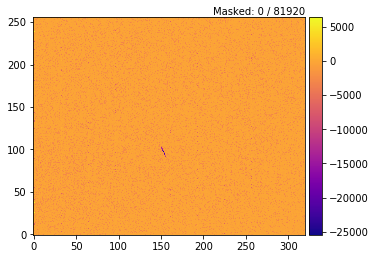

In [4]:
test.plot_array_heatmap_image()

In [5]:
test.echo170_gaussian_truncation(sigma_multiple=5,bin_size=10)

array([[False, False,  True, ..., False,  True, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False,  True],
       [ True, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

In [7]:
test.echo_synthesize_mask_dictionary()
test.echo_create_masked_array()

masked_array(
  data=[[-45.0, 0.0, --, ..., -133.0, --, -100.0],
        [-6.0, 0.0, --, ..., -62.0, -95.0, -102.0],
        [-62.0, 0.0, --, ..., -99.0, -93.0, -78.0],
        ...,
        [-66.0, 0.0, --, ..., -53.0, -33.0, --],
        [--, 0.0, -59.0, ..., -35.0, -45.0, -171.0],
        [-64.0, 0.0, --, ..., -65.0, -51.0, -38.0]],
  mask=[[False, False,  True, ..., False,  True, False],
        [False, False,  True, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        ...,
        [False, False,  True, ..., False, False,  True],
        [ True, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False]],
  fill_value=1e+20,
  dtype=float32)

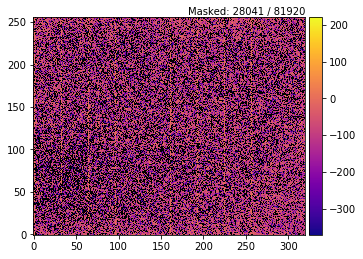

In [8]:
test.plot_array_heatmap_image()

In [ ]:
test.get_data()